In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.style.use("../config/custom_plots.mplstyle")

```yaml
nAgents: 10000
nSteps: 1000000
nSaveSteps: 10000
nRuns: 10
networkP: 0.8
networkM: 10
additionalLinksFraction: 0.01
virtualLayer: true
epidemicLayer: true
comorbidities: false
qVoterParameters:
  p: 0.3
  q: 6
epidemicLayerParameters:
  beta: 0.1
  gamma: 0.5
  mu: 0.9
  kappa: 0.1
maxInfectedTimeMean: 10
maxInfectedTimeStd: 5
positiveOpinionFraction: 1.0
infectedFraction: 0.1
fractionIllnessA: 0.0
fractionIllnessB: 0.0
outputFolder: simulations/results_change_q
firstParameterRange:
  start: 0.0
  end: 0.3
  count: 50
  vals: [ 3, 5, 7 ]
  type: q
secondParameterRange:
  start: 0.0
  end: 1.0
  count: 0
  vals: [ 0.0, 1.0 ]
  type: positiveOpinionFraction
linksRemoval: false
nQVoterPerStep: 1
```


In [2]:
def load_df(q, fracPos, nagents=10000, nsteps=1000000, nruns=10):
    dfs = []
    for n in range(nruns):
        path = f"../simulations/results_change_q/_NAGENTS={nagents}_NSTEPS={nsteps}_NETWORKP=0.8_FRAC_LINKS=0.01_FRAC_POS_OPINION={fracPos}_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p=0.30_q={q}_EPIDEMIC=beta=0.10_gamma=0.50_mu=0.90_kappa=0.10_I_TIME_MEAN=10.0_I_TIME_STD=5.0_NRUN={n}.tsv"
        df = pd.read_csv(path, sep="\t")
        dfs.append(df)
    dfs1 = pd.DataFrame(np.array([x.to_numpy() for x in dfs]).mean(axis=0),
                        index=df.index, 
                        columns=df.columns)
    return dfs1

q3_pos = load_df(3, 1.0)
q3_neg = load_df(3, 0.0)

q5_pos = load_df(5, 1.0)
q5_neg = load_df(5, 0.0)

q7_pos = load_df(7, 1.0)
q7_neg = load_df(7, 0.0)

In [27]:
colors = ['red', 'green', 'blue', 'orange', 'black', 'violet']
colors = ['xkcd:' + c for c in colors]

def print_run(dfs, labels, col, ylim=(-0.1, 1.1), xlim=(-1, 40), title=''):
    for i, df in enumerate(dfs):
        plt.plot(df.step / 10000, df[col], label=fr'{labels[i]}', color=colors[i])
    plt.xlabel("time")
    plt.ylim(*ylim)
    plt.xlim(*xlim)

def plot_per_metric(pos, neg, labels, col, ylim=(-0.1, 1.1), xlim=(-1, 40), ylog=False, xytext=[5, 0.85]):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    print_run(pos, labels, col, ylim, xlim)
    plt.text(xytext[0], xytext[1], '(a)', fontsize=30)
    plt.ylabel(col)
    plt.title('all positive opinions')
    if ylog:
        plt.yscale('log')

    plt.subplot(1, 2, 2)
    plt.text(xytext[0], xytext[1], '(b)', fontsize=30)
    print_run(neg, labels, col, ylim, xlim)
    plt.title('all negative opinions')
    plt.legend(loc='upper right')    
    if ylog:
        plt.yscale('log')


labels = ['q=3', 'q=5', 'q=7']
pos = [q3_pos, q5_pos, q7_pos]
neg = [q3_neg, q5_neg, q7_neg]

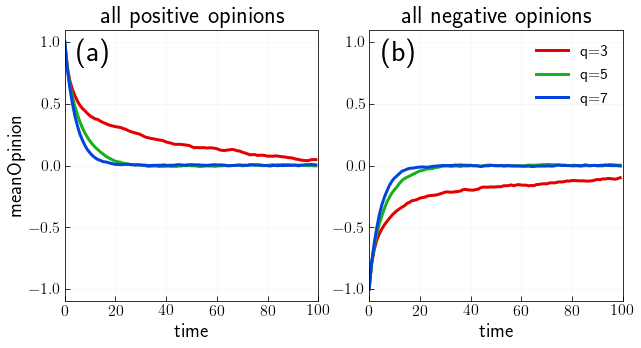

In [38]:
plot_per_metric(pos, neg, labels, 'meanOpinion', ylim=(-1.1, 1.1), xlim=(0, 100))
# plt.savefig('../plots/results_change_q_mean_opinion.pdf', bbox_inches='tight')

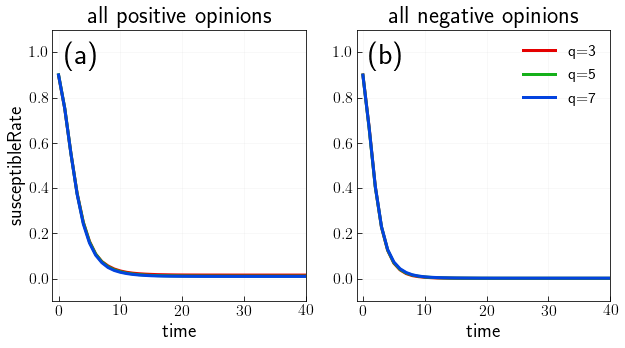

In [29]:
plot_per_metric(pos, neg, labels, 'susceptibleRate', xytext=[1, 0.95])

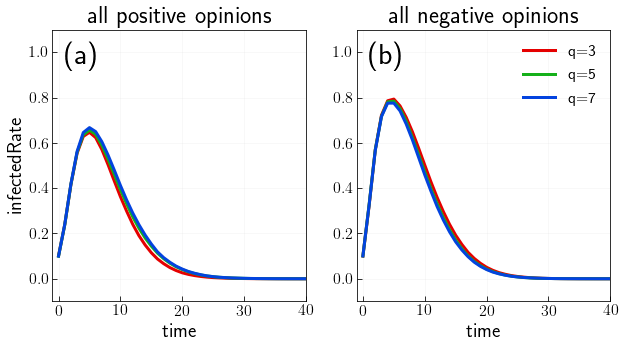

In [39]:
plot_per_metric(pos, neg, labels, 'infectedRate', xytext=[1, 0.95])
# plt.savefig('../plots/results_change_q_infected.pdf', bbox_inches='tight')

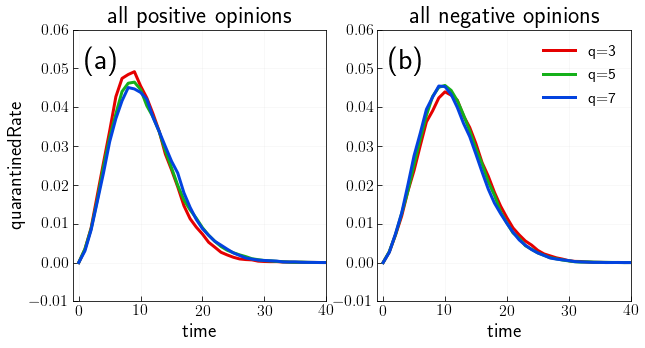

In [40]:
plot_per_metric(pos, neg, labels, 'quarantinedRate', ylim=(-0.01, 0.06), xytext=[1, 0.05])
# plt.savefig('../plots/results_change_q_quarantined.pdf', bbox_inches='tight')

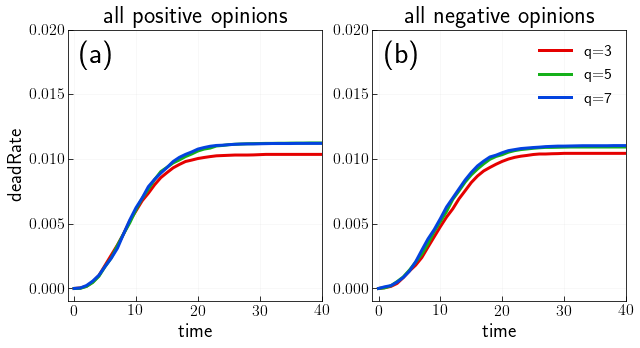

In [42]:
plot_per_metric(pos, neg, labels, 'deadRate', ylim=(-0.001, 0.02), xytext=[1, 0.0175])
# plt.savefig('../plots/results_change_q_dead.pdf', bbox_inches='tight')

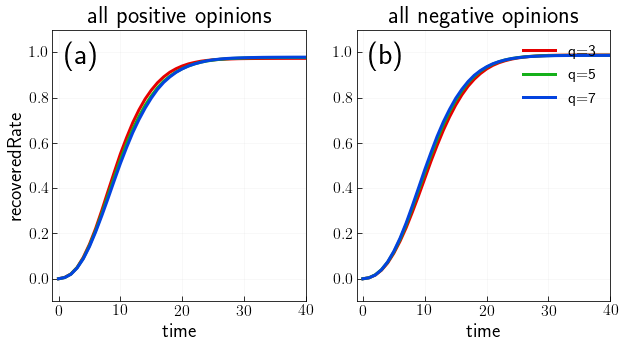

In [37]:
plot_per_metric(pos, neg, labels, 'recoveredRate', xytext=[1, 0.95])